In [1]:
import numpy as np
import scipy.io
import scipy

In [2]:
class GDA:
    """Perform Gaussian discriminant analysis (both LDA and QDA)."""
    def __init__(self, *args, **kwargs):
        self._fit = False
        self.params = {}
        self.cov = None
        self.labels = None
        #TODO: Possibly add new instance variables

    def evaluate(self, X, y, mode="lda"):
        """Predict and evaluate the accuracy using zero-one loss.

        Args:
            X (np.ndarray): The feature matrix shape (n, d)
            y (np.ndarray): The true labels shape (d,)

        Optional:
            mode (str): Either "lda" or "qda".

        Returns:
            float: The accuracy loss of the learner.

        Raises:
            RuntimeError: If an unknown mode is passed into the method.
        """
        #TODO: Compute predictions of trained model and calculate accuracy
        #Hint: call `predict` to simplify logic
        accuracy = np.sum(self.predict(X, mode = mode) == y) / y.shape[0]
        return accuracy

    def fit(self, X, y):
        """Train the GDA model (both LDA and QDA).

        Args:
            X (np.ndarray): The feature matrix (n, d)
            y (np.ndarray): The true labels (n, d)
        """
        #TODO: Train both the QDA and LDA model params based on the training data passed in
        # This will most likely involve setting instance variables that can be accessed at test time
        self._fit = True
        self.cov = np.zeros((X.shape[1], X.shape[1]))
        self.labels = np.unique(y)
        for i in np.unique(y):
            idx = y == i
            idx = idx.flatten()
            temp = X[idx]
            self.params[i] = [np.mean(temp, axis = 0), np.dot((temp - np.mean(temp, axis = 0)).T, temp - np.mean(temp, axis = 0))/temp.shape[0], temp.shape[0]/X.shape[0]]
            self.cov = self.cov + np.dot((temp - np.mean(temp, axis = 0)).T, temp - np.mean(temp, axis = 0))
        self.cov = self.cov/X.shape[0]
        

    def predict(self, X, mode="lda"):
        """Use the fitted model to make predictions.

        Args:
            X (np.ndarray): The feature matrix of shape (n, d)

        Optional:
            mode (str): Either "lda" or "qda".

        Returns:
            np.ndarray: The array of predictions of shape (n,)

        Raises:
            RuntimeError: If an unknown mode is passed into the method.
            RuntimeError: If called before model is trained
        """
        if not self._fit:
            raise RuntimeError("Cannot predict for a model before `fit` is called")

        preds = []
        if mode == "lda":
            #TODO: Compute test-time preditions for LDA model trained in 'fit'
            for i in self.params.values():
                preds += [scipy.stats.multivariate_normal.logpdf(X, mean = i[0], cov = self.cov, allow_singular = True) + np.log(i[2])]
            preds = self.labels[np.argmax(preds, axis=0)].reshape((-1,1))
        elif mode == "qda":
            for i in self.params.values():
                preds += [scipy.stats.multivariate_normal.logpdf(X, mean = i[0], cov = i[1], allow_singular = True) + np.log(i[2])]
            preds = self.labels[np.argmax(preds, axis=0)].reshape((-1,1))
        else:
            raise RuntimeError("Unknown mode!")
        return preds

In [3]:
data = scipy.io.loadmat("data/%s_data.mat" % "mnist")
train = data['training_data'].astype(float)
train_labels = data['training_labels']

In [4]:
import matplotlib.pyplot as plt

In [5]:
part_1 = dict()
for i in range(10):
    idx = train_labels == i
    idx = idx.flatten()
    temp = train[idx]
    part_1[i] = [np.mean(temp, axis = 0), np.cov(temp, rowvar = False), temp.shape[0]/train.shape[0]]
part_1

{0: [array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.16106703e-02,
         4.27148405e-02, 1.75586696e-02, 0.00000000e+00, 1.51950025e-02,
         4.15330069e-02, 1.97535033e-02, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000

part 2


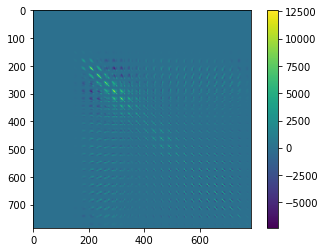

In [6]:
print('part 2')
idx = train_labels == 7
idx = idx.flatten()
temp = train[idx]
plt.imshow(np.cov(temp, rowvar = False))
plt.colorbar()

part 2: The diagonal terms are bigger than the off-diagonal terms. I could conclude that pixels that are close to each other have higher correlation values.

In [7]:
from sklearn import model_selection

In [8]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(train, train_labels, test_size = 10000)
error1 = []
error2 = []
for i in [100, 200, 500, 1000, 2000, 5000, 10000, 30000, 50000]:
    model = GDA()
    model.fit(X_train[:i], y_train[:i])
    error1 += [1 - model.evaluate(X_test, y_test)]
    error2 += [1 - model.evaluate(X_test, y_test, mode = 'qda')]

Text(0.5, 1.0, 'error rate vs training size for lda model')

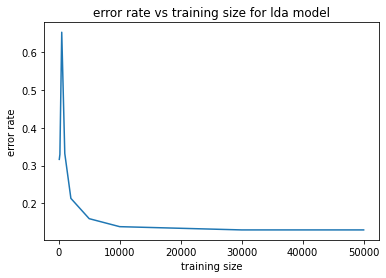

In [9]:
plt.plot([100, 200, 500, 1000, 2000, 5000, 10000, 30000, 50000], error1)
plt.xlabel("training size")
plt.ylabel("error rate")
plt.title("error rate vs training size for lda model")

Text(0.5, 1.0, 'error rate vs training size for qda model')

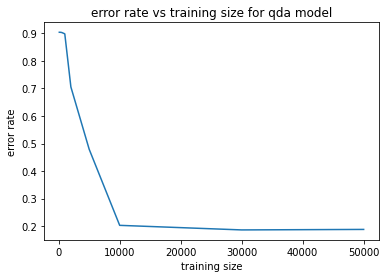

In [10]:
plt.plot([100, 200, 500, 1000, 2000, 5000, 10000, 30000, 50000], error2)
plt.xlabel("training size")
plt.ylabel("error rate")
plt.title("error rate vs training size for qda model")

lda performed a bit better for MNIST. Though in general qda could perform better due to more computations, qda could overfit in this case.

In [11]:
new_dict = dict()
errors_dict = dict()
for i in np.unique(y_test):
    new_dict[i] = [0, 0]
    errors_dict[i] = []
for i in [100, 200, 500, 1000, 2000, 5000, 10000, 30000, 50000]:
    model = GDA()
    model.fit(X_train[:i], y_train[:i])
    preds = model.predict(X_test)
    for j in range(len(y_test)):
        if y_test[j][0] == preds[j][0]:
            new_dict[y_test[j][0]][0] += 1
        new_dict[y_test[j][0]][1] += 1
    for z in np.unique(y_test):
        errors_dict[z] += [1 - (new_dict[z][0] / new_dict[z][1])]
    for k in np.unique(y_test):
        new_dict[k] = [0, 0]

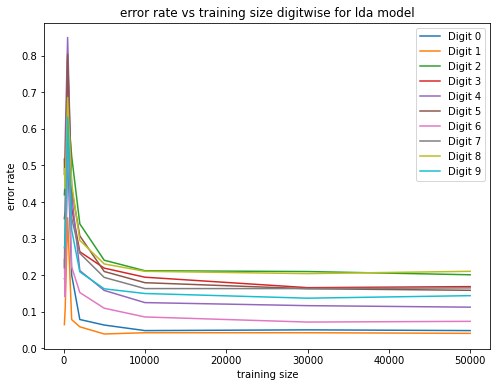

In [12]:
plt.figure(figsize=(8,6))
for i in np.unique(y_test):
    plt.plot([100, 200, 500, 1000, 2000, 5000, 10000, 30000, 50000], errors_dict[i])
plt.xlabel("training size")
plt.ylabel("error rate")
plt.title("error rate vs training size digitwise for lda model")
k = 'Digit'
plt.legend([k + ' 0', k + ' 1', k + ' 2', k + ' 3', k + ' 4', k + ' 5', k + ' 6', k + ' 7', k + ' 8', k + ' 9'])

Digit 1 is easiest to classify.

In [13]:
data = scipy.io.loadmat("data/%s_data.mat" % "mnist")
train = data['training_data'].astype(float)
train_labels = data['training_labels']
test = data['test_data']

In [14]:
model = GDA()
model.fit(train, train_labels)
y_pred = model.predict(test)

In [15]:
import pandas as pd

In [16]:
def results_to_csv(y_test):
    y_test = y_test.astype(int)
    df = pd.DataFrame({'Category': y_test})
    df.index += 1  # Ensures that the index starts at 1. 
    df.to_csv('submission.csv', index_label='Id')

In [17]:
results_to_csv(y_pred.flatten())

Kaggle score for MNIST: 0.87712

In [18]:
data = scipy.io.loadmat("data/%s_data.mat" % "spam")
train = data['training_data'].astype(float)
train_labels = data['training_labels']
test = data['test_data']

In [19]:
model = GDA()
model.fit(train, train_labels)
y_pred = model.predict(test)

In [20]:
results_to_csv(y_pred.flatten())

Kaggle score for SPAM: 0.81259